# Basic Nighttime Lights Raster Processing


You can get these data packages via the ['sez' tag at the SDRDL Data Repository](https://data.sandiegodata.org/?s=sez)

In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rowgenerators as rg
import fiona
import rasterio
import rasterio.mask
from IPython.display import display 
from rasterio.plot import reshape_as_raster, reshape_as_image, show
from tqdm.notebook import tqdm


%matplotlib inline
sns.set_context('notebook')


In [2]:
# Open the two main data packages
sez_p = mp.open_package('http://library.metatab.org/worldbank.org-sez-1.1.1.csv')
ntl_p = mp.open_package('http://library.metatab.org/figshare.com-harmonized_ntl-1.1.1.csv')

# Displaying the package shows metadata
sez_p


# Special economic zones
`worldbank.org-sez-1.1.1` Last Update: 2021-07-12T20:47:42

_Information on special economic zones have been individually collected and researched in a study focusing on the governance of SEZ. This is just a subset (586) of the extant global SEZs, which have been estimated at 3500-4000._


## Documentation Links

* [Documentation Page](http://library.metatab.org/worldbank.org-sez-1.1.1/index.html) 
* [Dataset webpage](https://datacatalog.worldbank.org/dataset/special-economic-zones-sez) 
* [Dataset viewer web application](http://devseed.com/sez-viewer/#/BGD6) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [sez](http://library.metatab.org/worldbank.org-sez-1.1.1/data/sez.csv)**. Special Economic Zones

In [3]:
ntl_p

# Multiyear Nightime Light Intensity
`figshare.com-harmonized_ntl-1.1.1` Last Update: 2021-07-12T20:47:57

_Temporally calibrated DMSP-OLS NTL time series data from 1992-2013; and converted NTL time series from the VIIRS data (2014-2018) Spatial resolution: 30 arc-seconds (~1km)_


This dataset provides reference links to each of the annual noghtime lights images from a
collection of images built from DMSP and VIIRS data, for the years 1992 to 2018.
## Documentation Links

* [Documentation Page](http://library.metatab.org/figshare.com-harmonized_ntl-1.1.1/index.html) 
* [Research paper](https://www.nature.com/articles/s41597-020-0510-y) 
* [Download page](https://figshare.com/articles/dataset/Harmonization_of_DMSP_and_VIIRS_nighttime_light_data_from_1992-2018_at_the_global_scale/9828827/2) 

 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)
* **Creator** Xuecao Li, Department of Geological and Atmospheric Sciences, Iowa State University
* **Creator** Yuyu Zhou, Department of Geological and Atmospheric Sciences, Iowa State University
* **Creator** Min Xhao, Department of Geological and Atmospheric Sciences, Iowa State University
* **Creator** Xia Zhao, Department of Geological and Atmospheric Sciences, Iowa State University


## References
<ul><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2008_calDMSP.tif&resource_format=zip">ntl2008</a></strong>. Wordlwide night times lights raster, 2008</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2009_calDMSP.tif&resource_format=zip">ntl2009</a></strong>. Wordlwide night times lights raster, 2009</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2010_calDMSP.tif&resource_format=zip">ntl2010</a></strong>. Wordlwide night times lights raster, 2010</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2011_calDMSP.tif&resource_format=zip">ntl2011</a></strong>. Wordlwide night times lights raster, 2011</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2012_calDMSP.tif&resource_format=zip">ntl2012</a></strong>. Wordlwide night times lights raster, 2012</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2013_calDMSP.tif&resource_format=zip">ntl2013</a></strong>. Wordlwide night times lights raster, 2013</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2014_simVIIRS.tif&resource_format=zip">ntl2014</a></strong>. Wordlwide night times lights raster, 2014</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2015_simVIIRS.tif&resource_format=zip">ntl2015</a></strong>. Wordlwide night times lights raster, 2015</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2016_simVIIRS.tif&resource_format=zip">ntl2016</a></strong>. Wordlwide night times lights raster, 2016</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2017_simVIIRS.tif&resource_format=zip">ntl2017</a></strong>. Wordlwide night times lights raster, 2017</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_2018_simVIIRS.tif&resource_format=zip">ntl2018</a></strong>. Wordlwide night times lights raster, 2018</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1992_calDMSP.tif&resource_format=zip">ntl1992</a></strong>. Wordlwide night times lights raster, 1992</li><li> <strong><a href="https://ndownloader.figshare.com/articles/9828827/versions/2#Harmonized_DN_NTL_1993_calDMSP.tif&resource_format=zip">ntl1993</a></strong>. Wordlwide nig

In [4]:
# open the administrative boundaries packages
ab_p = mp.open_package('http://library.metatab.org/berkeley.edu-administrative_boundaries-1.1.1.csv')

abframes = [ ab_p.resource(r.name).geoframe() for r in ab_p.resources() if r.name.endswith('admin2') ]



In [5]:
import metapack as mp

# Create Dataframes
sez = sez_p.resource('sez').geoframe()

# Update the SEZ geometries to be a 10KM buffer around the point. We project to 
# EPSG:3395, World Mercator, to be able to make the buffer in meters. 
g =  sez.to_crs(3395).buffer(10_000)

sez['geo_area'] = g.area
sez['geometry'] = g.to_crs(4326)

In [6]:
# The operational date col is a string, so make an int year column. 
sez['year'] = pd.to_numeric(sez.operational_date, errors='coerce')

rsez = sez[(sez.year >= 1994) & ( sez.year <= 2014)]
len(rsez)

419

In [7]:
# Load a year of rasters, masked and cropped to a geometry
# See the rasterio documentation for more examples: 
# https://rasterio.readthedocs.io/en/latest/topics/masking-by-shapefile.html
def load_ntl(pkg, year, shapes=None):
    
    ref = pkg.reference(f'ntl{year}').resolved_url.get_resource().get_target()
    
    with rasterio.open(ref.fspath) as src:
        
        if shapes is not None:
            img, transform = rasterio.mask.mask(src, shapes, crop=True)
        else:
            img =  src.read()
            transform = None
            
        meta = src.meta
      
        
        return img, meta, transform



In [8]:
# Create a set of tasks parameters, year and geometry of the SEZ
tasks = [  (year, r.id, r.geometry) for idx,r in rsez.iterrows() for year in list(range(1992, 2018+1))]
print(len(tasks))

11313


In [9]:
from joblib import Parallel, delayed

# Run the extraction tasks in parallel
# First, define the function we will run in parallel
def _f(year, sez_id, geo):
    try:
        return (year, sez_id, load_ntl(ntl_p, year, [geo])[0])
    except Exception as e:
        (year, sez_id, e)

# Second, run the tasks
patches = Parallel(prefer='threads')(delayed(_f)(*t) for t in tqdm(tasks))

exc = [(year, sez_id,  e) for year, sez_id,  e in patches if isinstance(e, Exception)]
print(f"Exceptions: {len(exc)}")


  0%|          | 0/11313 [00:00<?, ?it/s]

Exceptions: 0


-rw-r--r--  1 eric  staff  6040938 Jul 15 14:14 patches.pkl


In [130]:
import h5py 
with h5py.File('sez_circ_patches.h5', 'w') as f:
    for year, sez_id,  e in patches:
        k = f'circle/{year}/{sez_id}'
        f[k] = e

In [134]:
def get_hdf_keys(f):
    """Return all of the dataset keys in an HDF5 file"""
    keys = []
    f.visit(lambda key : keys.append(key) if isinstance(f[key], h5py.Dataset) else None)
    return keys

with h5py.File('sez_circ_patches.h5', 'r') as f:
    keys = get_hdf_keys(f)


['circle/1992/134',
 'circle/1992/135',
 'circle/1992/136',
 'circle/1992/137',
 'circle/1992/138',
 'circle/1992/139',
 'circle/1992/140',
 'circle/1992/141',
 'circle/1992/142',
 'circle/1992/143']

In [81]:
t = [ (year, sez_id,np.nansum(rast)) for (year, sez_id,  rast) in patches ]
t = pd.DataFrame(t, columns=['year', 'id', 'pixel_sum'])

t = t.merge(rsez[['id', 'geo_area', 'year']].rename(columns={'year':'op_year'}), on='id')
t['mean_light'] = t.pixel_sum / t.geo_area

# Unit Norm
t_ = t.mean_light-t.mean_light.min()
t['mean_light_un'] = (t_/t_.max())

t = t[t.op_year > 1996] # so we are certain to have a few years of light data before
g = t.groupby('id')

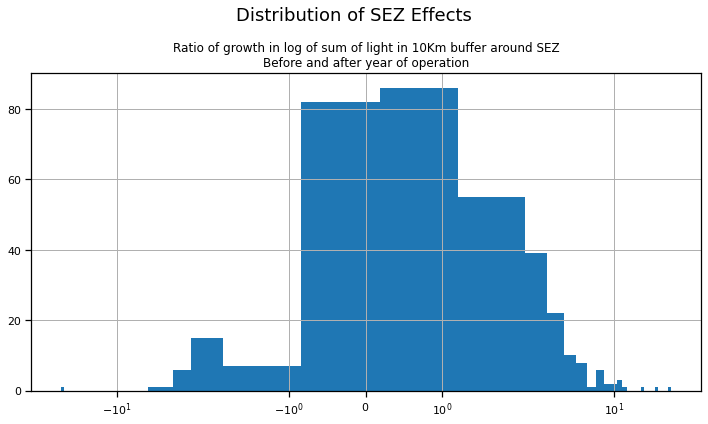

In [124]:
def slope_(df):
    from numpy.linalg import LinAlgError
    
    x = np.log(df['mean_light'])
    y = df['year'] - min(df['year'])

    try:
        fit = np.polyfit(x,y,1)
    except LinAlgError:
        # Didn't converge
        return np.nan
   
    return fit[0]

def slope(df):
    bf = df[df.year<df.op_year].sort_values('year').reset_index(drop=True)
    af = df[df.year>df.op_year].sort_values('year').reset_index(drop=True)

    
    return pd.Series([slope_(bf), slope_(af)])

slopes = g.apply(slope).rename(columns={0:'pre_slope',1:'post_slope'}).reset_index()
slopes['slope_diff'] = (slopes.post_slope - slopes.pre_slope)/slopes.pre_slope
plt.xscale('symlog')
slopes.slope_diff.hist(bins = 50, figsize=(10, 6))
plt.suptitle('Distribution of SEZ Effects', fontsize=18)
plt.title('Ratio of growth in log of sum of light in 10Km buffer around SEZ\nBefore and after year of operation')
plt.tight_layout()

In [114]:
slopes.describe()

,id,pre_slope,post_slope,slope_diff
count,378.000000,351.000000,375.000000,351.000000
mean,363.500000,13.872162,24.854121,1.463880
std,109.263443,14.433679,25.690007,3.375635
min,175.000000,-55.778528,-64.901261,-25.415199
25%,269.250000,6.657407,10.545481,0.022811
50%,363.500000,10.561463,19.690038,0.899016
75%,457.750000,17.172859,34.325354,2.495697
max,552.000000,122.972082,152.339041,25.783962
